In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
gdp = pd.read_csv("interpolated_data/gdp.csv")
fertility_rate = pd.read_csv("interpolated_data/fertility_rate.csv")
life_expectancy = pd.read_csv("interpolated_data/life_expectancy.csv")
school_enrollment = pd.read_csv("interpolated_data/school_enrollment_secondary.csv")
school_enrollment_ter = pd.read_csv("interpolated_data/school_enrollment_tertiary.csv")
gov_exp_edu = pd.read_csv("interpolated_data/gov_exp_edu.csv")

In [11]:
gdp.head(10)

,Unnamed: 0,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,...,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",Vietnam,Vanuatu,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,0,0.001,62.369375,177.336687,0.001,3671.814839,21168.206153,1072.983659,17.580073,0.001,...,76.410726,155.294494,939.560806,12.040419,450.603428,154.603796,122.354062,529.561923,228.567399,276.643363
1,1,0.001,62.443703,185.943577,0.001,3844.831801,21523.920981,1120.332610,19.382709,0.001,...,80.804050,163.424988,954.355361,13.231576,465.482633,163.860878,126.950998,543.042224,216.274674,279.332656
2,2,0.001,60.950364,194.968195,0.001,4026.001373,21879.635809,1163.186836,21.370185,0.001,...,85.449975,166.603164,1006.879977,14.540573,480.853159,173.672239,131.720645,560.699395,208.562685,275.966139
3,3,0.001,82.021738,204.430816,0.001,4215.707706,22235.350637,855.275656,23.561453,0.001,...,90.363022,154.654878,1060.570324,15.979070,496.731229,184.071066,136.669491,601.599951,209.453362,277.532515
4,4,0.001,85.511073,214.352697,0.001,4414.353055,22591.065465,1179.504098,25.977411,0.001,...,95.558550,163.884562,874.199411,17.559876,513.133603,195.092535,141.804269,642.688431,236.941713,282.376856
5,5,0.001,105.243196,224.756129,0.001,4622.358630,22946.780293,1285.260799,28.641098,0.001,...,101.052802,165.127008,869.906867,19.297072,530.077593,206.773928,147.131965,681.131112,296.022427,294.893605
6,6,0.001,143.103233,235.664483,0.001,4840.165488,23302.495121,1277.968419,31.577916,0.001,...,106.862952,173.197927,877.196049,21.206128,547.581085,219.154758,152.659826,718.118179,334.672528,279.337779
7,7,0.001,167.165675,247.102264,0.001,5068.235466,23658.209949,1065.898520,34.815871,0.001,...,113.007163,167.776727,894.683818,23.304046,565.662553,232.276904,158.395374,775.152812,350.653425,295.056449
8,8,0.001,134.012768,259.095169,0.001,5307.052167,24013.924777,1143.810428,38.385841,0.001,...,119.504644,160.299923,940.201420,25.609511,584.341082,246.184754,164.346410,813.508497,398.557506,302.802871
9,9,0.001,134.250360,271.670140,0.001,5557.121979,24369.639605,1331.639709,42.321871,0.001,...,126.375704,171.426806,934.047607,28.143055,603.636387,260.925352,170.521031,887.246703,472.640293,346.538920


In [47]:
def data_prep(data_a: pd.DataFrame, data_b: pd.DataFrame):
    # only use countries that are in both tables
    country_list = []
    data_a_keys = data_a.keys()
    data_b_keys = data_b.keys()

    for c in data_a_keys:
        if not c in data_b_keys: continue
        if c == "Unnamed: 0": continue
        country_list.append(c)

    return country_list

In [63]:
def calc_correlation(gdp: list, data: list, data_name: str):
    # let's do that for all countries
    x, y = [], []

    def add_values(c):
        c_gdp = list(gdp.get(c))
        c_data = list(data.get(c))
        
        for i in range(len(c_gdp)):
            if c_gdp[i] == -1 or c_data == -1: continue
            if c_gdp[i] == 0.001 or c_data == 0.001: continue
            else:
                x.append(c_gdp[i])
                y.append(c_data[i])

    country_list = data_prep(gdp, data)
    for c in country_list:
        add_values(c)

    x = list(np.log(np.array(x)))
    # y = list(np.log(np.array(y)))

    plt.scatter(x, y, s=1)
    plt.xlabel("GDP per capita (current US$) - logarithmic transformed")
    plt.ylabel(data_name)
    plt.show()
    
    out = f"correlation between GDP and {data_name}: {np.corrcoef(np.array(x), np.array(y))[0][1]}"

    return out

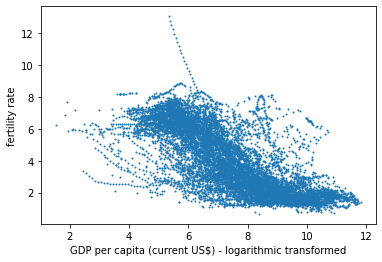

'correlation between GDP and fertility rate: -0.7364435711346305'

In [56]:
calc_correlation(gdp, fertility_rate, "fertility rate")

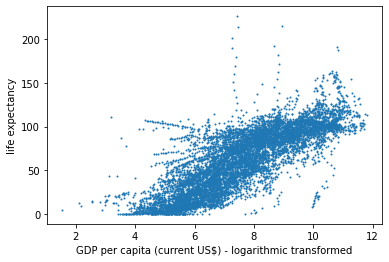

'correlation between GDP and life expectancy: 0.807038050270447'

In [57]:
calc_correlation(gdp, life_expectancy, "life expectancy")

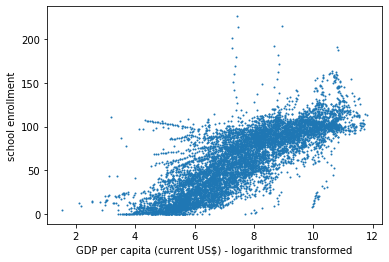

'correlation between GDP and school enrollment: 0.807038050270447'

In [64]:
calc_correlation(gdp, school_enrollment, "school enrollment")

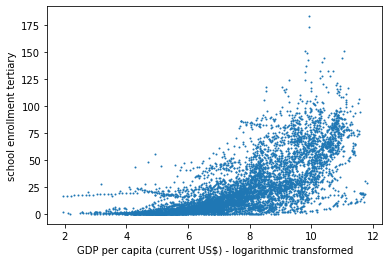

'correlation between GDP and school enrollment tertiary: 0.7227646665443245'

In [66]:
calc_correlation(gdp, school_enrollment_ter, "school enrollment tertiary")

In [46]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from scipy.stats import pearsonr

r2_score(x, y)
pearsonr(x, y)

PearsonRResult(statistic=0.7227646665443245, pvalue=0.0)

In [77]:
from tqdm import tqdm
hp_x = (np.array(x) * 10).astype(int)
hp_y = (np.array(y) * 10).astype(int)

print(np.max(hp_x), np.max(hp_y))

heatmap = list(np.zeros((120, 90)))

print(np.unique(hp_x, return_counts=True))

# for i in tqdm(hp_x):
    # for j in hp_y:
        # heatmap[i][j] += 1

118 88
(array([  9,  11,  15,  18,  19,  20,  21,  23,  25,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118]), array([  1,   1,   1,   1,   1,   1,   1,   1,   2,   1,   2,   3,   4,
         6,   3,   4,  10,   7,  14,   8,  10,  16,  18,  22,  36,  28,
        41,  42,  59,  68,  90,  88, 100, 110, 115, 133, 161, 191, 195,
       193, 178, 182, 177, 192, 171, 180, 184, 221, 243, 214, 191, 192,
       206, 209, 212, 208, 179, 201, 215, 206, 195, 189, 203, 197, 206,
       219, 159, 169, 173, 175, 182, 158, 140, 153, 135, 140, 117, 12

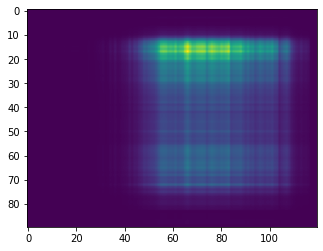

In [70]:
plt.imshow(np.array(heatmap).T)
plt.show()